In [1]:
import numpy as np
import pandas as pd

### `Q-1:` Write a program to create an empty series.

In [2]:
# code here
pd.Series()

Series([], dtype: object)

### `Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [3]:
# code here
s1 = pd.Series([2, 4, 6, 8, 10])
s2 = pd.Series([1, 3, 5, 7, 10])

print(s1 + s2)
print(s1 - s2)
print(s1 * s2)
print(s1 / s2)

0     3
1     7
2    11
3    15
4    20
dtype: int64
0    1
1    1
2    1
3    1
4    0
dtype: int64
0      2
1     12
2     30
3     56
4    100
dtype: int64
0    2.000000
1    1.333333
2    1.200000
3    1.142857
4    1.000000
dtype: float64


### `Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]



In [4]:
# code here
s1 = pd.Series([2, 4, 6, 8, 10])
s2 = pd.Series([1, 3, 5, 7, 10])

In [5]:
s1 == s2

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [6]:
s1 > s2

0     True
1     True
2     True
3     True
4    False
dtype: bool

### `Q-5.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [7]:
# code here
def func(ser):
    return pd.to_numeric(ser, errors='coerce')

ser = pd.Series([1,2,'Python', 2.0, True, 100])
func(ser)

0      1.0
1      2.0
2      NaN
3      2.0
4      1.0
5    100.0
dtype: float64

Download data - https://drive.google.com/file/d/1LRhXwbEodeWXtzPhJCX0X9Lf_BECzvqb/view?usp=share_link
All Batsman runs series in IPL 2008 to 2022.

Below questions are based on this data.

### `Q-6` Find top 10 most run getter from the series.

In [8]:
# code here
batters = pd.read_csv('./content/batsman_runs_series.csv', index_col = 0).squeeze(True)
batters.index.name = None
batters

A Ashish Reddy     280
A Badoni           161
A Chandila           4
A Chopra            53
A Choudhary         25
                  ... 
Yash Dayal           0
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2754
Z Khan             117
Name: batsman_run, Length: 605, dtype: int64

In [9]:
top_10_batters = batters.sort_values(ascending = False).head(10)
top_10_batters

V Kohli           6634
S Dhawan          6244
DA Warner         5883
RG Sharma         5881
SK Raina          5536
AB de Villiers    5181
CH Gayle          4997
MS Dhoni          4978
RV Uthappa        4954
KD Karthik        4377
Name: batsman_run, dtype: int64

### `Q-7` No of players having runs above 3000

In [10]:
# code here
mask = batters > 3000
mask.sum()

20

### `Q-8` No of players having runs above mean value?

In [11]:
# code here
mean = batters.mean()
mask = batters > mean
mask.sum()

128

Download data - https://drive.google.com/file/d/1QZuZ5bypUInfVvarHACLAi8tXXHvb8xd/view?usp=share_link

file name - items.csv



### `Q-9`
    i. Read `items.csv` making `item_name` as index.
    ii. Show no of nan values
    ii. Item price is given in $, so convert it to rupees without currency symbol.
    iii. Make data type of newly made series as float.
    iv. Fill nan with mean of the series


How csv file looks

```
item_name	item_price
Chips and Fresh Tomato Salsa	$2.39
Izze	$3.39
Nantucket Nectar	$3.39
Chips and Tomatillo-Green Chili Salsa	$2.39
Chicken Bowl	$16.98

```

In [12]:
# code here
items = pd.read_csv('./content/items.csv', index_col='item_name').squeeze(True)
items.index.name = None
items

Chips and Fresh Tomato Salsa              $2.39 
Izze                                      $3.39 
Nantucket Nectar                          $3.39 
Chips and Tomatillo-Green Chili Salsa     $2.39 
Chicken Bowl                             $16.98 
                                          ...   
Steak Burrito                            $11.75 
Steak Burrito                            $11.75 
Chicken Salad Bowl                       $11.25 
Chicken Salad Bowl                        $8.75 
Chicken Salad Bowl                        $8.75 
Name: item_price, Length: 4622, dtype: object

In [13]:
# Number of nan values
items.isnull().sum()

50

In [14]:
def func(value):
    try:
        y = value[1::]
        return float(y) * 82.83
    except Exception as ex:
        return np.nan

In [15]:
# Item price is given in $, so convert it to rupees without currency symbol.

# my function ---> this also works fine
# def func(value):
#     if type(value) == float:
#         # we have a missing value
#         return np.nan
#     else:
#         # the value which we have received is not a missing value
#         # so first remove the $ from it and make it a float
#         # then convert this float into rupees
#         return float(value[1::]) * 82.83

new_items = items.apply(func)
new_items

Chips and Fresh Tomato Salsa              197.9637
Izze                                      280.7937
Nantucket Nectar                          280.7937
Chips and Tomatillo-Green Chili Salsa     197.9637
Chicken Bowl                             1406.4534
                                           ...    
Steak Burrito                             973.2525
Steak Burrito                             973.2525
Chicken Salad Bowl                        931.8375
Chicken Salad Bowl                        724.7625
Chicken Salad Bowl                        724.7625
Name: item_price, Length: 4622, dtype: float64

In [16]:
# Make data type of newly made series as float.
# already float so no code

In [17]:
# Fill nan with mean of the series
mean_new_items = new_items[new_items.notnull()].mean()
mean_new_items

618.1628988188977

In [18]:
new_items.fillna(value = mean_new_items, inplace = True)
new_items

Chips and Fresh Tomato Salsa              197.9637
Izze                                      280.7937
Nantucket Nectar                          280.7937
Chips and Tomatillo-Green Chili Salsa     197.9637
Chicken Bowl                             1406.4534
                                           ...    
Steak Burrito                             973.2525
Steak Burrito                             973.2525
Chicken Salad Bowl                        931.8375
Chicken Salad Bowl                        724.7625
Chicken Salad Bowl                        724.7625
Name: item_price, Length: 4622, dtype: float64

### `Q-10`:
    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



In [19]:
# code here
mean_price = new_items.mean()
mean_price

618.1628988188976

In [20]:
new_items.quantile(q = 0.3)
new_items.quantile(q = 0.06)

103.5375

In [21]:
np.percentile(new_items, [30, 6])

array([368.5935, 103.5375])

In [22]:
# Number of items price between [1000 and 2000]
mask = new_items.between(1000, 2000)
mask.sum()

116

<Axes: ylabel='Frequency'>

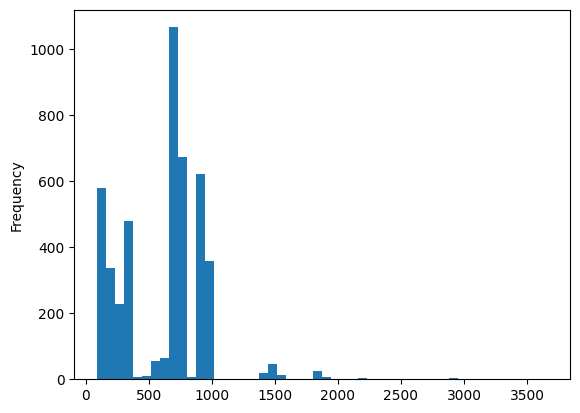

In [23]:
new_items.plot.hist(bins = 50)